In [79]:
%matplotlib inline
import numpy as np
import pandas as pd
np.random.seed(123)  # for reproducibility

from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [2]:
# 4. Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print X_train.shape

(60000, 28, 28)


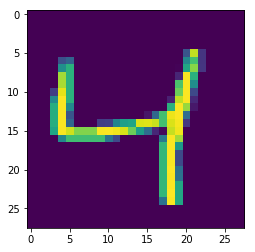

In [3]:
plt.imshow(X_train[2])

In [15]:
from scipy import stats
stats.describe(y_train)


(60000,
 (0, 9),
 4.4539333333333335,
 8.3478836602832267,
 0.02585709979496666,
 -1.2545989921921752)

In [20]:
ab = list(y_train)
ab.count(0)


5923

In [45]:
count = {ab.count(x) for x in ab}
y = list(count)

In [46]:
x = range(10)
print x, y


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [5923, 5958, 5421, 5842, 6131, 6742, 6265, 5851, 5949, 5918]


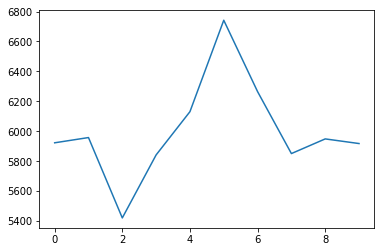

In [47]:

plt.plot(x,y)

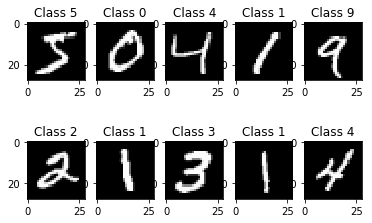

In [52]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [53]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
print y_train.shape

(60000,)


In [54]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [16]:
Y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [55]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28), 
                        dim_ordering='th'))

In [18]:
print model.output_shape

(None, 32, 26, 26)


In [56]:
model.add(Convolution2D(32, 3, 3, activation='relu'))

In [20]:
print model.output_shape

(None, 30, 24, 32)


In [57]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [22]:
print model.output_shape

(None, 15, 12, 32)


In [58]:
model.add(Dropout(0.25))

In [24]:
print model.output_shape

(None, 15, 12, 32)


In [59]:
model.add(Flatten())

In [26]:
print model.output_shape

(None, 5760)


In [60]:
model.add(Dense(128, activation='relu'))

In [28]:
print model.output_shape

(None, 128)


In [61]:
model.add(Dropout(0.5))

In [62]:
model.add(Dense(10, activation='softmax'))

In [31]:
print model.output_shape

(None, 10)


In [63]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [64]:
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=1, verbose=1)

Epoch 1/1
60000/60000 [==============================] - 311s - loss: 0.5526 - acc: 0.9005       

In [65]:
score = model.evaluate(X_test, Y_test, verbose=0)
print score

[0.069254959263140334, 0.97799999999999998]


In [66]:
predicted_classes = model.predict_classes(X_test)
print predicted_classes

10000/10000 [==============================] - 27s     

In [155]:
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
incorrect_indices_9 = np.nonzero((9 == y_test) & (predicted_classes !=9))[0]
incorrect_indices_7 = np.nonzero((7 == y_test) & (predicted_classes !=7))[0]

In [157]:
df_a = pd.DataFrame(y_test,columns=['Actual'])
df_p = pd.DataFrame(predicted_classes, columns=['Predicted'])
df = df_a.join(df_p)
df['pred_flag'] = np.where(df['Actual'] == df['Predicted'],1,0)
#df_sum = df.groupby(['Actual','pred_flag']).agg('count')
#df_sum.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))
#df['Percent'] = df.groupby('Actual')['pred_flag'].transform(lambda x: 100*x/sum(x))
df_sum_p = df.groupby(['Predicted','pred_flag']).agg('count')
df_sum_p.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))

Actual
Predicted pred_flag           
0         0           3.280318
          1          96.719682
1         0           1.826087
          1          98.173913
2         0           3.250478
          1          96.749522
3         0           1.588878
          1          98.411122
4         0           2.620968
          1          97.379032
5         0           1.244344
          1          98.755656
6         0           0.842993
          1          99.157007
7         0           1.700000
          1          98.300000
8         0           2.173913
          1          97.826087
9         0           3.300000
          1          96.700000

In [146]:
df[(df['Actual']==9) & (df['pred_flag']==0)]

,Actual,Predicted,pred_flag
78,9,4,0
359,9,4,0
448,9,8,0
1232,9,4,0
1247,9,3,0
1553,9,8,0
1559,9,5,0
1709,9,3,0
1901,9,4,0
1952,9,8,0


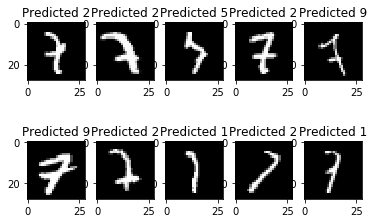

In [156]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices_7[:10]):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}".format(predicted_classes[incorrect]))